<a href="https://colab.research.google.com/github/salwaadalla/e-news-express-landing-page-analysis/blob/main/ENews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-news Express


## Define Problem Statement and Objectives

Problem: The executives at E-news portal believe that there has been a decline in new monthly subscribers compared to the past year, and they think the webpage needs to be updated in terms of outline and content to meet customer preferences.

Objective: The objective is to test the new landing page to see if it attracts new subscribers.

To achieve this, 100 users were randomly selected and divided equally into two groups. The first group was shown the existing landing page, while the second group was shown the new landing page. The interactions of both groups were collected for analysis.

Now, the collected data will be explored and analyzed to determine the effectiveness of the new landing page in attracting new subscribers through answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language?

4. Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/python course/Business Statistics/project/abtest.csv')

## Data Overview:

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


* It can be observed that except `user_id` and `time_spent_on_the_page`, rest all the variables are categorical in nature

In [ ]:
df.shape

(100, 6)

* The dataset has 100 rows and 6 columns.

In [ ]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

* There is no missing values in the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* There are a total of 100 non-null observations in each of the columns

* There are 6 columns named **'user_id', 'group', 'landing_page', 'time_spent_on_the_page', 'converted', 'language_preferred'** whose data types are **int64, object, object, float64, object, object** respectively


* 'group', 'landing_page', 'converted', and 'language_preferred' are objects

In [ ]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


* The user_id column contains the user ID of the person visiting the page.
* The maximum time spent on the landing page is less than 11 minutes.
* The mean time spent on the landing page is approximately 5.4 minutes.
* The median time spent on the landing page is approximately 5.4 minutes.

In [ ]:
df.describe(include='object')

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


- Variables `group`, `landing_page` and `converted` have only two categories
- It can be observed that the distribution of users in `group` and `landing_page` are equal
- More than 50% of users are converted
- There are three categories of languages preferred by users, among which Spanish has been preferred the most by users.

In [ ]:
df.duplicated().sum()

0

* No duplicates in the data.

### Univariate Analysis

**- Observation on numerical data:**

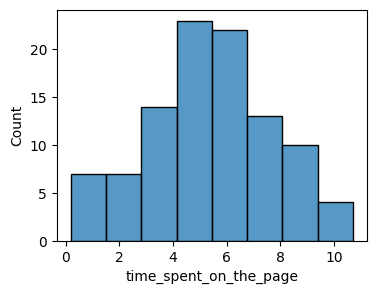

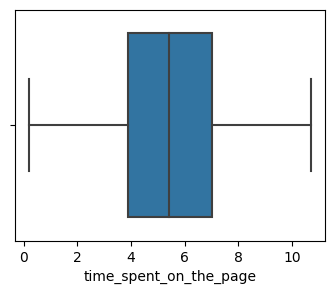

In [ ]:
plt.figure(figsize=(4, 3))
sns.histplot(data= df, x='time_spent_on_the_page')
plt.show()
plt.figure(figsize=(4, 3))
sns.boxplot(data= df, x='time_spent_on_the_page')
plt.show()

In [ ]:
df['time_spent_on_the_page'].mean()

5.377800000000001

- Time spent is normally distributed with a mean value arround 5 min.
- The boxplot show no outliers, the spent time over the page is from (0 - 10) minutes.

**- Observations on categorical data:**

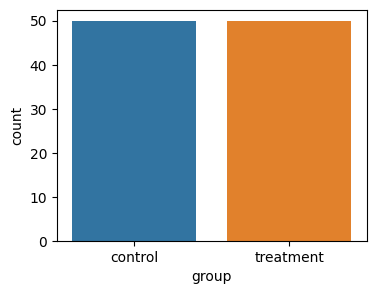

In [ ]:
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x= 'group')
plt.show()

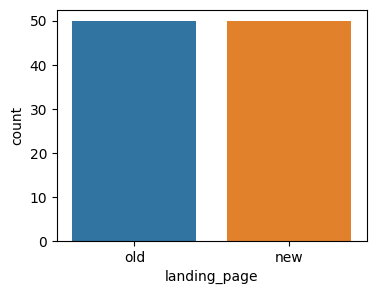

In [ ]:
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x= 'landing_page')
plt.show()

- The randomly choosed 100 sample where equally divided in two groups; control group and tratment group.
- Control group where given the old page and tretment group where given the new updates page, which is proven by the two  countplots above.

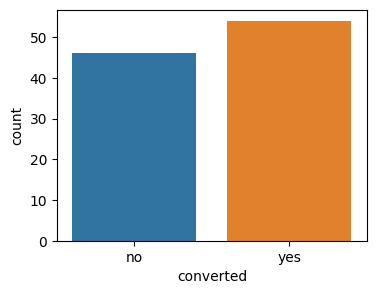

In [ ]:
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x= 'converted')
plt.show()

In [ ]:
df['converted'].value_counts(normalize =True)

yes    0.54
no     0.46
Name: converted, dtype: float64

- 54% of the randomly choosen sample where converted to subscriber of the news portal
- 46% of he randomly choosen sample did not subscribe to the news portal

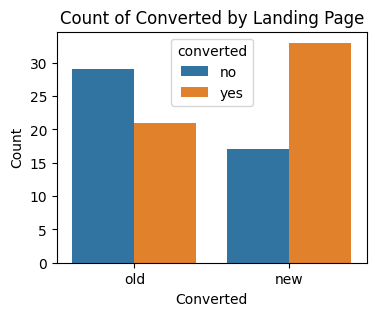

In [ ]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='landing_page', hue='converted')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.title('Count of Converted by Landing Page')
plt.show()

In [ ]:
df2 = df[df['landing_page']=='old']
print ('Count for converted:','\n',df2['converted'].value_counts())
print('----------')
print ('percent for converted:','\n',df2['converted'].value_counts(normalize = True))

Count for converted: 
 no     29
yes    21
Name: converted, dtype: int64
----------
percent for converted: 
 no     0.58
yes    0.42
Name: converted, dtype: float64


In [ ]:
df1 = df[df['landing_page']=='new']
print ('Count  for converted:','\n',df1['converted'].value_counts())
print('----------')
print ('percent for converted:','\n',df1['converted'].value_counts(normalize = True))

Count  for converted: 
 yes    33
no     17
Name: converted, dtype: int64
----------
percent for converted: 
 yes    0.66
no     0.34
Name: converted, dtype: float64


- 58% of the contol sample (given the old page) converted to subscriber of the news portal
- 66% of the tretment sample (given the new page) converted to subscriber of the news portal.
- It seems that the subscription is Higher with the new page but still there is not enough statistical evidence to prove that.

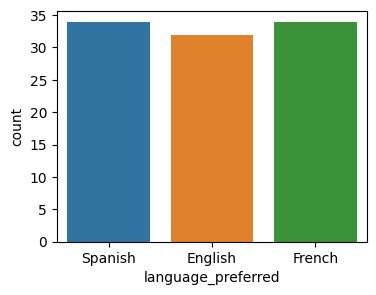

In [ ]:
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x= 'language_preferred')
plt.show()

In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

- Spanish and French are most prefered languages, then the English language.

### Bivariate Analysis

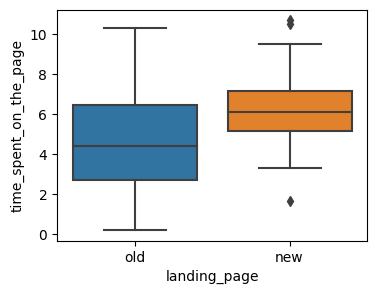

In [ ]:
plt.figure(figsize=(4, 3))
sns.boxplot(data = df, x= 'landing_page', y='time_spent_on_the_page')
plt.show()

In [ ]:
df3= df[df['landing_page']=='new']
mean_time_spent_new = df3['time_spent_on_the_page'].mean()
df4= df[df['landing_page']=='old']
mean_time_spent_old= df4['time_spent_on_the_page'].mean()
print ('The mean time spent on the new page:',round(mean_time_spent_new,2) )
print ('The mean time spent on the old page:',round(mean_time_spent_old,2))

The mean time spent on the new page: 6.22
The mean time spent on the old page: 4.53


- The mean of time spent on the new page is around 6.22 which is higher than mean time spent on the old page which is 4.53.
- There are outiers in spent time for the new page which is more than 10 min.

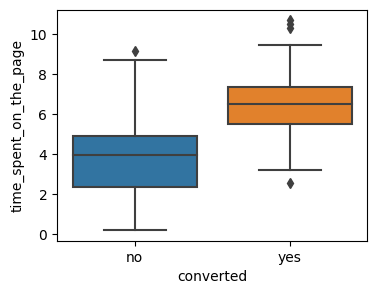

In [ ]:
plt.figure(figsize=(4, 3))
sns.boxplot(data = df, x= 'converted', y='time_spent_on_the_page')
plt.show()

- The subscribers of the news portal spent more time than the non subscribers.

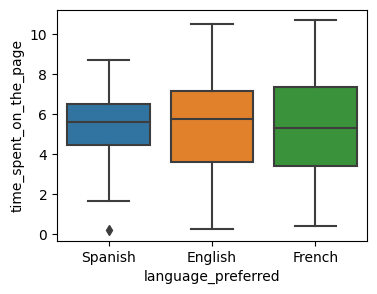

In [ ]:
plt.figure(figsize=(4, 3))
sns.boxplot(data = df, x= 'language_preferred', y='time_spent_on_the_page')
plt.show()

* The median time spent by the different language users are approximately equal.
* The mean time spent by the different language users are approximately equal.

Exploring time spent on the new landing page and existing landing page:

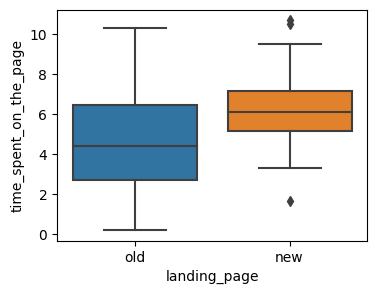

In [ ]:
plt.figure(figsize=(4, 3))
sns.boxplot(data = df, x= 'landing_page', y='time_spent_on_the_page')
plt.show()

- The mean of time spent on the new page is more than the mean time spent on the old page.
- That is not enough statistical data to prove it.

Defining the null and alternate hypotheses

- Assuming that:

- $𝜇_1$ = The mean time spent on the new landing page

- $𝜇_2$ = The mean time spent on the old landing page

- $H_0:$   $𝜇_1$ = $𝜇_2$

- $H_a:$   $𝜇_1$ > $𝜇_2$




* Selecting Appropriate test:

   * This is a one-tailed test for the significance of two means from two indepent populations. As the population standard deviation is unknown, a two-sample t-test will be appropriate to test the formulated hypotheses.

The significance level is mentioned in the problem statment: $\alpha = 0.05$.

Collecting and preparing data:

In [ ]:
time_spent_old=df[df['landing_page']=='old']['time_spent_on_the_page']
time_spent_new=df[df['landing_page']=='new']['time_spent_on_the_page']
print('The standard deviation of the old page is:', round(time_spent_old.std(),2))
print('The standard deviation of the new page is:', round(time_spent_new.std(),2))

The standard deviation of the old page is: 2.58
The standard deviation of the new page is: 1.82


As the sample standard deviations are different, the population standard deviations may be assumed to be different.

Calculating the p-value:

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
test_stat,p_value = ttest_ind(time_spent_new,time_spent_old, equal_var= False, alternative='greater')
print('p_value =',p_value)

p_value = 0.0001392381225166549


Comparing the p-value with $\alpha$:

In [ ]:
if p_value>0.05:
  print('We fail to reject the null hypothesis as the p_value is greater than significance level (𝛼=0.05)')
else:
  print('we reject the null hypothesis as the p_value is smaller than significance level (𝛼=0.05) ')

we reject the null hypothesis as the p_value is smaller than significance level (𝛼=0.05) 


- Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean time spent on the new page is higher than the old page.

**A similar approach can be followed to answer the other questions.**

Exploring the conversion rate for the new page greater compared tp the conversion rate for the old page:

In [ ]:
contingency_table = pd.crosstab(df['landing_page'], df['converted'],margins=False, normalize=False)
contingency_table


converted,no,yes
landing_page,,
new,17,33
old,29,21


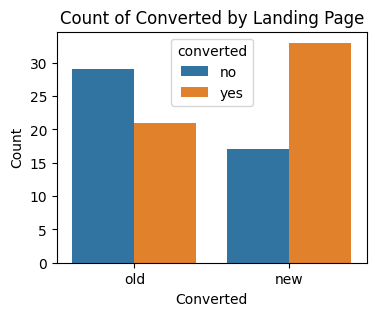

In [ ]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='landing_page', hue='converted')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.title('Count of Converted by Landing Page')
plt.show()

* By observing the above plot,the overall the number of users who get converted is more for the new page than the old page.

* Next step is performing hypothesis test to see if there is enough statistical evidence to say that the conversion rate for the new page is greater than the old page.

Assuming that:

$p_1$ = The conversion proportion of users of the new landing page

$p_2$ = The conversion proportion of users of the old landing page


$H_0:$   $p_1$ = $p_2$

$H_a:$   $p_1$ > $p_2$

---------------

- This is a one-tailed test for two population proportion  form two indepent populations. A two proportion z-test will be appropriate to test the formulated hypotheses.


- The significance level is mentioned in the problem statment: $\alpha = 0.05$.

In [ ]:
new_pgae_subscribers = df[df['landing_page'] == 'new']
n_1 = len(new_pgae_subscribers[new_pgae_subscribers['converted'] == 'yes'])
old_pgae_subscribers = df[df['landing_page'] == 'old']
n_2 = len(old_pgae_subscribers[old_pgae_subscribers['converted'] == 'yes'])
p_1 = len(df[df['group'] == 'control'])
p_2 = len(df[df['group'] == 'treatment'])

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
test_stat, p_value = proportions_ztest([n_1,n_2],[p_1,p_2],alternative = 'larger')
print('p_value =',p_value)

p_value = 0.008026308204056278


In [ ]:
if p_value>0.05:
  print('We fail to reject the null hypothesis as the p_value is greater than significance level (𝛼=0.05)')
else:
  print('We reject the null hypothesis as the p_value is smaller than significance level (𝛼=0.05) ')

We reject the null hypothesis as the p_value is smaller than significance level (𝛼=0.05) 


- Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the conversion rate of users who visit the new landing page is greater than the conversion rate of the old landing page users.

Exploring if conversion and preferred language are independent or related:

In [ ]:
contingency_table1 = pd.crosstab(df['language_preferred'], df['converted'],margins=False, normalize=False)
contingency_table1

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


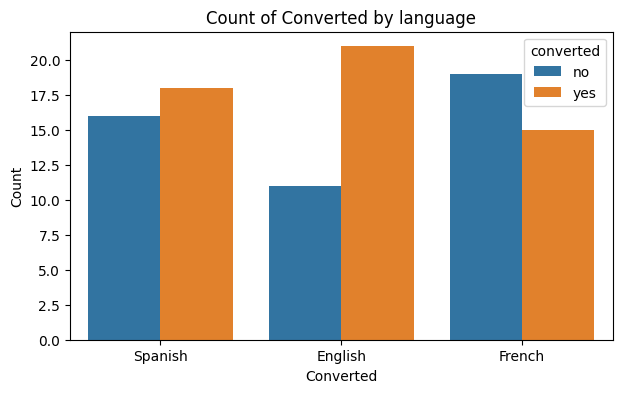

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='language_preferred', hue='converted')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.title('Count of Converted by language')
plt.show()


$H_0:$  Conversion is independent on the prefered language

$H_a:$ Conversion is dependent on the prefered language

---------------

- This is a test of independency for two categorical variables. A chi_square test for independence will be appropriate to test the formulated hypotheses.


- The significance level is mentioned in the problem statment: $\alpha = 0.05$.

In [ ]:
from scipy.stats import chi2_contingency
chi, p_value, dof, expected = chi2_contingency(contingency_table1)
print('p_value =',p_value)

p_value = 0.2129888748754345


In [ ]:
if p_value>0.05:
  print('We fail to reject the null hypothesis as the p_value is greater than significance level (𝛼=0.05)')
else:
  print('We reject the null hypothesis as the p_value is smaller than significance level (𝛼=0.05) ')

We fail to reject the null hypothesis as the p_value is greater than significance level (𝛼=0.05)



- Since the p-value is greater than the 5% significance level (𝛼=0.05), we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the conversion rate of users and preferred language are dependent (related).

Exploring time spent on the new page for the different language users:

In [ ]:
df_new = df[df['landing_page']=='new']
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

<ipython-input-19-0f41546dd6e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_new, x= 'language_preferred', y='time_spent_on_the_page', palette='Set2')


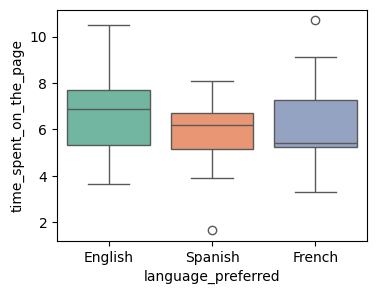

In [ ]:
plt.figure(figsize=(4, 3))
sns.boxplot(data = df_new, x= 'language_preferred', y='time_spent_on_the_page', palette='Set2')
plt.show()

* The mean time spent on the new page by English users is a bit higher than the mean time spent by French and Spanish users, but we need to test if this difference is statistically significant or not.

Assuming that:

$𝜇_1$ = The mean time spent on the new landing page for English users

$𝜇_2$ = The mean time spent on the old landing page for Spanish users

$𝜇_3$ = The mean time spent on the old landing page for French users


$H_0:$   $𝜇_1$ = $𝜇_2$ = $𝜇_3$

$H_a:$   At least one mean is different from the rest.

---------------

- This test includes comparing three population means. A f_oneway anova test will be appropriate to test the formulated hypotheses.

- The significance level is mentioned in the problem statment: $\alpha = 0.05$.
___________________

- first test on normality and variance equality need to be done:

   * For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

   * For equality of variance, Levene test is applied to the response variable.

* Shapiro-Wilk’s test

Assuming that:

>$H_0:$ Time spent on the new page follows a normal distribution

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [ ]:
from scipy.stats import shapiro

w, p_value = shapiro(df_new['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


* Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

* Levene’s test

Assuming that:

>$H_0$: All the population variances are equal

>$H_a$: At least one variance is different from the rest

In [ ]:
from scipy.stats import levene
statistic, p_value = levene( df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page'],
                             df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page'],
                             df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


* Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

F-oneway test:

In [ ]:
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page'],
                              df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page'],
                              df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page'])
print('p_value =',p_value)

p_value = 0.43204138694325955


In [ ]:
if p_value>0.05:
  print('We fail to reject the null hypothesis as the p_value is greater than significance level (𝛼=0.05)')
else:
  print('We reject the null hypothesis as the p_value is smaller than significance level (𝛼=0.05) ')

We fail to reject the null hypothesis as the p_value is greater than significance level (𝛼=0.05)


- Since the p-value is greater than the 5% significance level (𝛼=0.05), we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that at least one mean is different from the rest.

## Conclusion and Business Recommendations


- The sample data consists of two equally divided groups, the control group, and the treatment group, where the control group was shown the old landing page and the treatment group was shown the new landing page.

- Around 50% of the users spend approximately 4 to 7 minutes on the E-news portal.

- The users spend more time on the new page.
  - This indicates that the outline & recommended content of the new page is more likely to keep customers engaged long enough to make a decision to subscribe

- The conversion rate for the new page is greater than the conversion rate of the old page
  - This indicates that the new page is more likely to gather new subscribers than the existing page

- The conversion status is independent of the preferred language

- The time spent on the new page does not differ with the language of the content
  - This indicates that irrespective of the language, the outline & recommended content of the new page are engaging

- Recommendations: Based on the analysis, E-news company should use the new landing page to gather more subscribers and focus on updating the outline and content of their portal to meet customer preferences, as there is enough statistical evidence to show that the new design has attracted more subscribers compared to the old page.

___